In [243]:
import matplotlib
import yfinance
import pandas as pd
import fundamentus as fundamentus
import numpy as np

In [244]:
all_brazillian_stocks_df = fundamentus.get_resultado().reset_index()

c:\code\investments\virtualenv\lib\site-packages\fundamentus\resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


In [245]:
def aplicate_initial_filters(df, pl_min, pl_max, pvp_min, pvp_max, dy, mrgliq, roe, liq2m, c5y_revenue):
    final_df = df
    final_df = final_df[final_df['pl'] > pl_min]
    final_df = final_df[final_df['pl'] < pl_max]
    final_df = final_df[final_df['pvp'] > pvp_min]
    final_df = final_df[final_df['pvp'] < pvp_max]
    final_df = final_df[final_df['dy'] > dy]
    final_df = final_df[final_df['mrgliq'] > mrgliq]
    final_df = final_df[final_df['roe'] > roe]
    final_df = final_df[final_df['liq2m'] > liq2m]
    final_df = final_df[final_df['c5y'] > c5y_revenue]
    return final_df

In [246]:
PL_MIN = 1
PL_MAX = 10
PVP_MIN = 0.9
PVP_MAX = 2
DY = 0.04
MRGLIQ = 0.2
ROE = 0.1
LIQ2M = 1000000
C5Y_REVENUE = 0.1
START = '2018-12-30'
END = '2023-01-01'

In [247]:
df = aplicate_initial_filters(all_brazillian_stocks_df, PL_MIN, PL_MAX, PVP_MIN, PVP_MAX, DY, MRGLIQ, ROE, LIQ2M, C5Y_REVENUE)

In [248]:
filtered_tickers = list(df.loc[:, "papel"])
new_array = []
for ticker in filtered_tickers:
    if ((ticker != 'LAVV3') and (ticker != 'RECV3')):
        new_array.append(f'{ticker}.SA')
filtered_tickers = new_array

In [249]:
prices = pd.DataFrame()

for ticker in filtered_tickers:
    prices[ticker] = yfinance.download(ticker, start = START, end = END, progress = False)['Adj Close']  

first = prices.iloc[0]

In [250]:
tickers_allocation_dict = dict()
for ticker in filtered_tickers:
    tickers_allocation_dict[ticker] = 100

In [251]:
df = pd.Series(data = tickers_allocation_dict, index = list(tickers_allocation_dict.keys()))
stocks_amount = round(df/first, 0)
PL = prices/stocks_amount
PL['PL Total'] = PL.sum(axis = 1)

In [252]:
ibov = yfinance.download('^BVSP', start = START, end = END)['Adj Close']
ibov = pd.DataFrame(ibov)
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

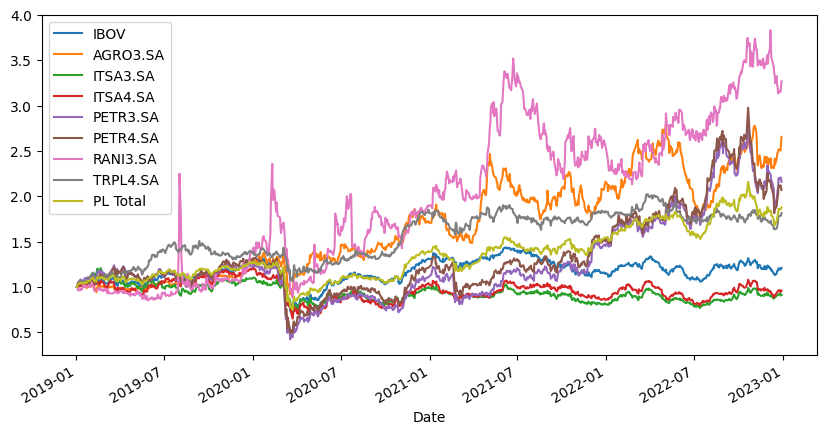

In [253]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
consolidado_ajustado = consolidado/consolidado.iloc[0]
consolidado_ajustado.plot(figsize = (10,5))

<Axes: xlabel='Date'>

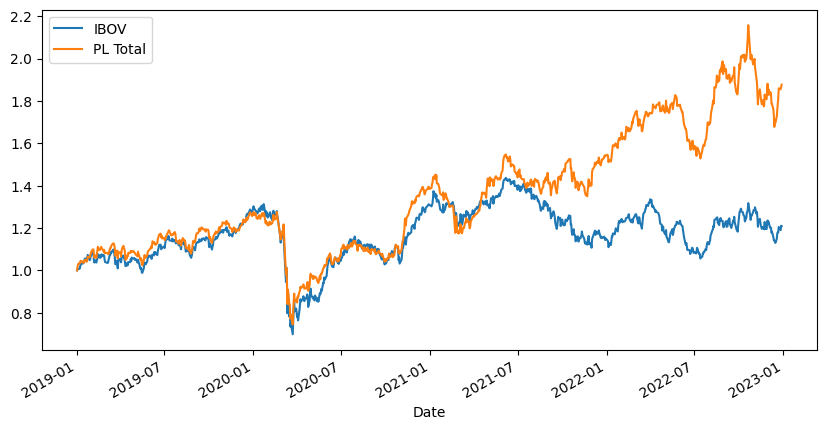

In [254]:
consolidado_ajustado[['IBOV', 'PL Total']].plot(figsize = (10,5))